# Import Libraries and Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pmd
import scipy.stats

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


# Data Cleaning & Preprocessing 

In [4]:
# remove unwanted columns
col=["store","item"]
df.drop(col,axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


In [6]:
# change date to datetime
df.date=df.date.astype("datetime64[ns]")

In [7]:
# group sales into month
df.date=df.date.dt.to_period("M")

In [8]:
df

,date,sales
0,2013-01,13
1,2013-01,11
2,2013-01,14
3,2013-01,13
4,2013-01,10
...,...,...
912995,2017-12,63
912996,2017-12,59
912997,2017-12,74
912998,2017-12,62


In [9]:
# convert to time stamp
df.date=df.date.dt.to_timestamp()

In [10]:
df

,date,sales
0,2013-01-01,13
1,2013-01-01,11
2,2013-01-01,14
3,2013-01-01,13
4,2013-01-01,10
...,...,...
912995,2017-12-01,63
912996,2017-12-01,59
912997,2017-12-01,74
912998,2017-12-01,62


In [11]:
# sum up sales in each month
df=df.groupby("date").sum()

# Data Visualization 

Text(0.5, 1.0, 'Monthly Sales')

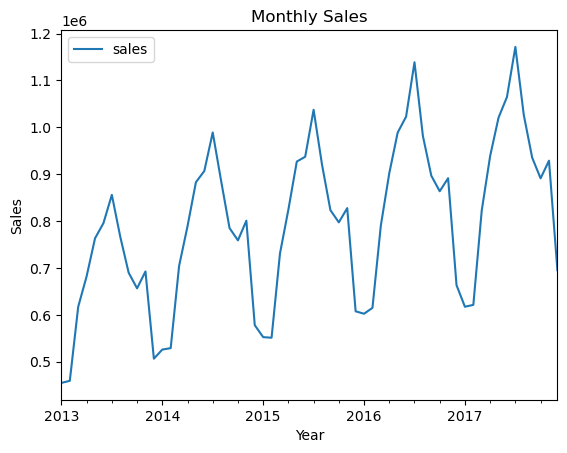

In [12]:
df.plot()
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Monthly Sales")

# Exploratory Data Analysis

## Time Series Decomposition

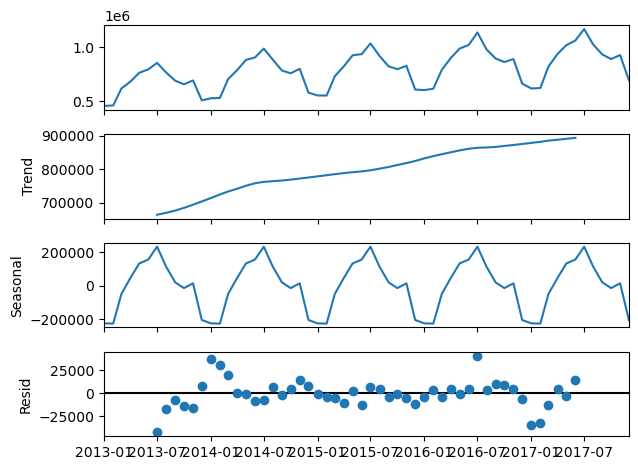

In [13]:
d=sm.tsa.seasonal_decompose(df,model="additive")
d.plot()
plt.show()

## Auto Correlation

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

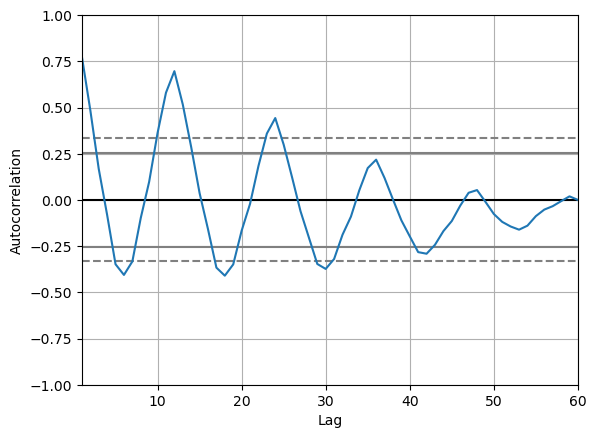

In [14]:
autocorrelation_plot(df)

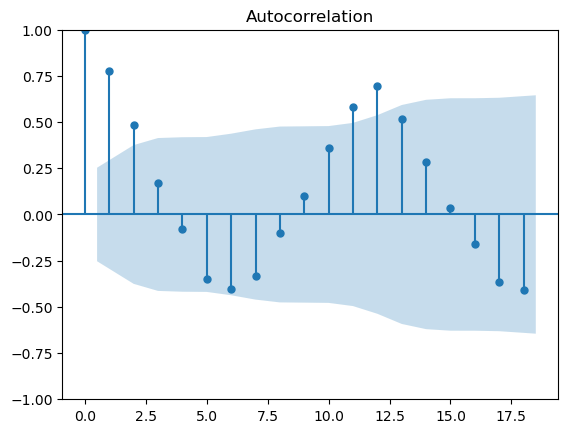

In [15]:
plot_acf(df)
plt.show()

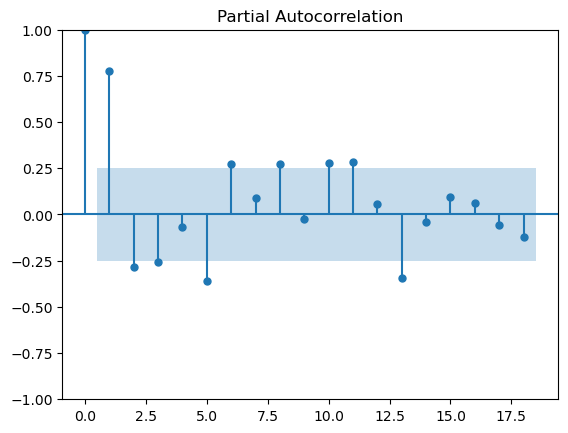

In [16]:
plot_pacf(df)
plt.show()

## Stationarity Check

In [17]:
dftest = adfuller(df, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -5.2475188500163545
2. P-Value :  7.026495391574649e-06
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 48
5. Critical Values :
	 1% :  -3.5745892596209488
	 5% :  -2.9239543084490744
	 10% :  -2.6000391840277777


In [18]:
# p value is > 0.05 meaning the data is not stationary. SARIMA is appropriate for the model

# Building the SARIMA Model

In [19]:
model=pmd.auto_arima(df,start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1041.563, Time=0.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1051.141, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1041.111, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1040.606, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1053.090, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1039.926, Time=0.33 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1041.152, Time=0.14 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1042.252, Time=0.28 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1042.965, Time=0.28 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1037.702, Time=1.02 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=1034.146, Time=0.83 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(2,1,1)[12]          

In [20]:
train_data=df[:-12]
test_data=df[-12:]

In [24]:
# fit the model into the data 
sarima=SARIMAX(train_data,order=(0,1,0),seasonal_order=(2,1,2,12))
predicted=sarima.fit().predict();predicted

C:\Users\i\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\i\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\i\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2013-01-01    0.000000e+00
2013-02-01    4.549040e+05
2013-03-01    4.594170e+05
2013-04-01    6.173820e+05
2013-05-01    6.822740e+05
2013-06-01    7.632420e+05
2013-07-01    7.955970e+05
2013-08-01    8.559220e+05
2013-09-01    7.667610e+05
2013-10-01    6.899070e+05
2013-11-01    6.565870e+05
2013-12-01    6.926430e+05
2014-01-01    1.025758e+06
2014-02-01    5.311549e+05
2014-03-01    7.100064e+05
2014-04-01    7.786103e+05
2014-05-01    8.816323e+05
2014-06-01    9.199275e+05
2014-07-01    9.759216e+05
2014-08-01    8.869097e+05
2014-09-01    7.975887e+05
2014-10-01    7.469685e+05
2014-11-01    8.001716e+05
2014-12-01    5.877489e+05
2015-01-01    5.456713e+05
2015-02-01    5.555438e+05
2015-03-01    7.323789e+05
2015-04-01    8.197804e+05
2015-05-01    9.220368e+05
2015-06-01    9.503732e+05
2015-07-01    1.023772e+06
2015-08-01    9.299724e+05
2015-09-01    8.148981e+05
2015-10-01    7.973771e+05
2015-11-01    8.407673e+05
2015-12-01    5.956483e+05
2016-01-01    5.993872e+05
2

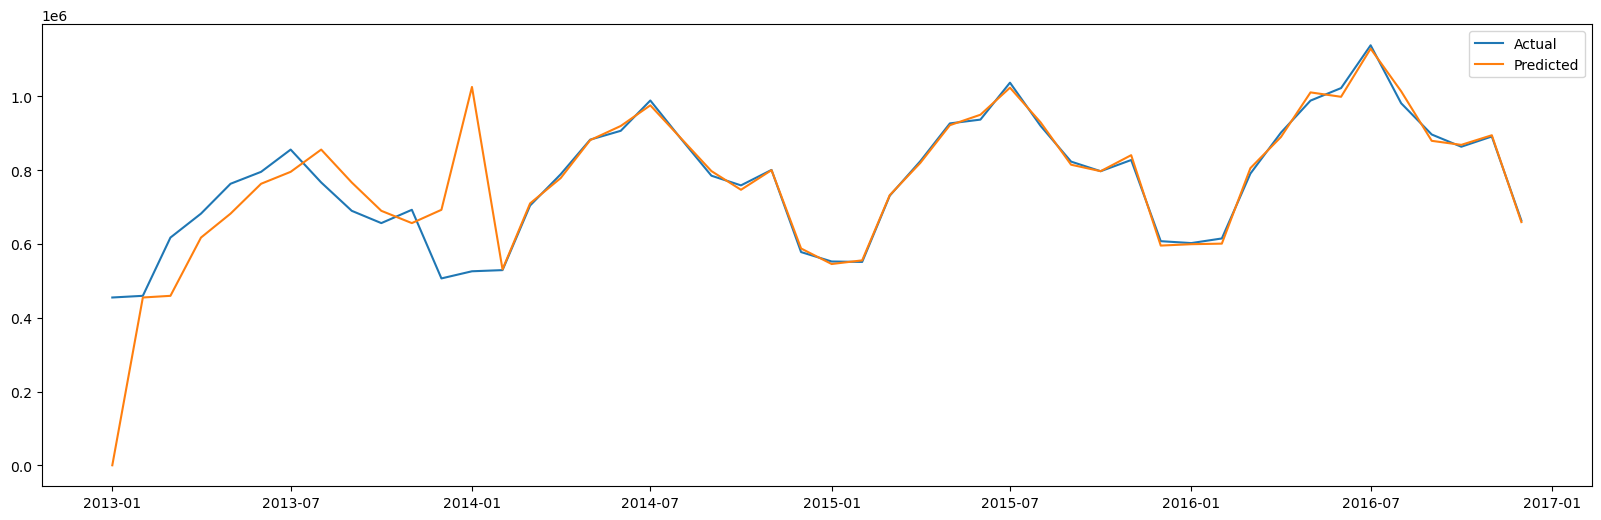

In [28]:
plt.figure(figsize=(20,6))
plt.plot(train_data,label='Actual')
plt.plot(predicted,label='Predicted')
plt.legend()

# Test Model

In [29]:
sarima1=SARIMAX(test_data,order=(0,1,0),seasonal_order=(2,1,2,12)) 
predicted1=sarima1.fit().predict();predicted1

C:\Users\i\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\i\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\i\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2017-01-01          0.0
2017-02-01     617306.0
2017-03-01     621369.0
2017-04-01     822667.0
2017-05-01     938862.0
2017-06-01    1020686.0
2017-07-01    1064624.0
2017-08-01    1171393.0
2017-09-01    1026403.0
2017-10-01     935263.0
2017-11-01     891160.0
2017-12-01     928837.0
Freq: MS, Name: predicted_mean, dtype: float64

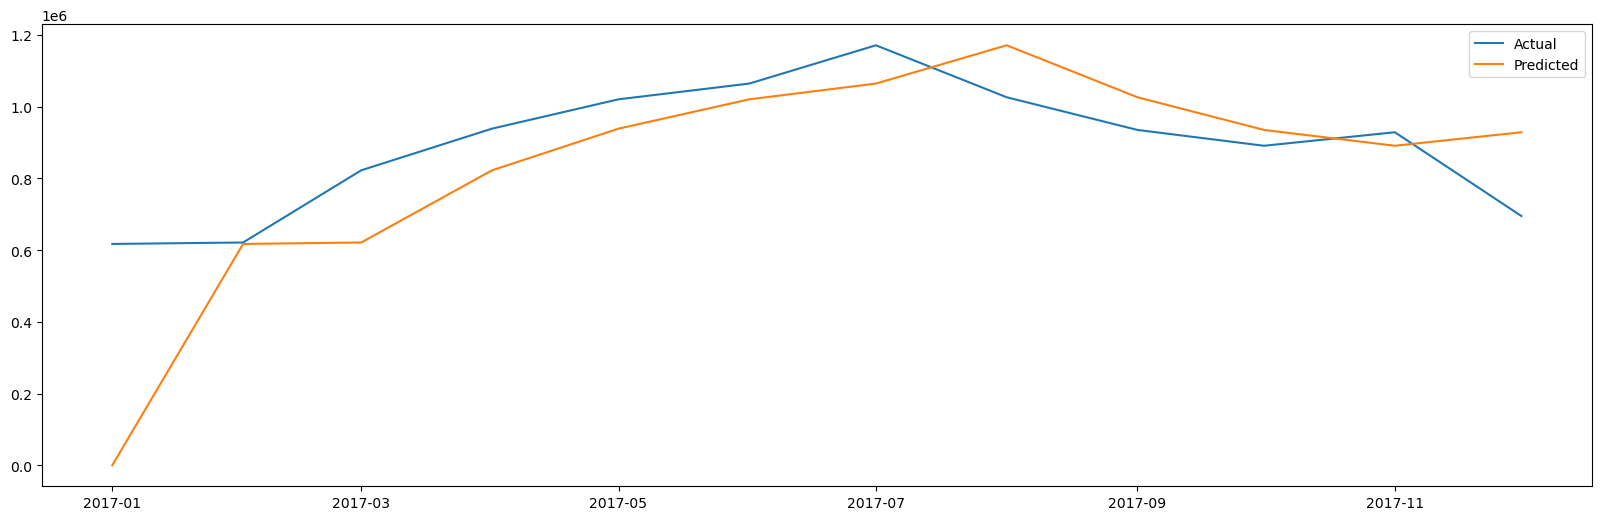

In [30]:
plt.figure(figsize=(20,6))
plt.plot(test_data,label='Actual')
plt.plot(predicted1,label='Predicted')
plt.legend()

# Sales prediction for the next 3 years

In [34]:
model.fit(test_data)
pred1=model.predict(n_periods=36);pred1

2018-01-01    1.003823e+06
2018-02-01    1.007886e+06
2018-03-01    1.209184e+06
2018-04-01    1.325379e+06
2018-05-01    1.407203e+06
2018-06-01    1.451141e+06
2018-07-01    1.557910e+06
2018-08-01    1.412920e+06
2018-09-01    1.321780e+06
2018-10-01    1.277677e+06
2018-11-01    1.315354e+06
2018-12-01    1.081687e+06
2019-01-01    1.390340e+06
2019-02-01    1.394403e+06
2019-03-01    1.595701e+06
2019-04-01    1.711896e+06
2019-05-01    1.793720e+06
2019-06-01    1.837658e+06
2019-07-01    1.944427e+06
2019-08-01    1.799437e+06
2019-09-01    1.708297e+06
2019-10-01    1.664194e+06
2019-11-01    1.701871e+06
2019-12-01    1.468204e+06
2020-01-01    1.776857e+06
2020-02-01    1.780920e+06
2020-03-01    1.982218e+06
2020-04-01    2.098413e+06
2020-05-01    2.180237e+06
2020-06-01    2.224175e+06
2020-07-01    2.330944e+06
2020-08-01    2.185954e+06
2020-09-01    2.094814e+06
2020-10-01    2.050711e+06
2020-11-01    2.088388e+06
2020-12-01    1.854721e+06
Freq: MS, dtype: float64

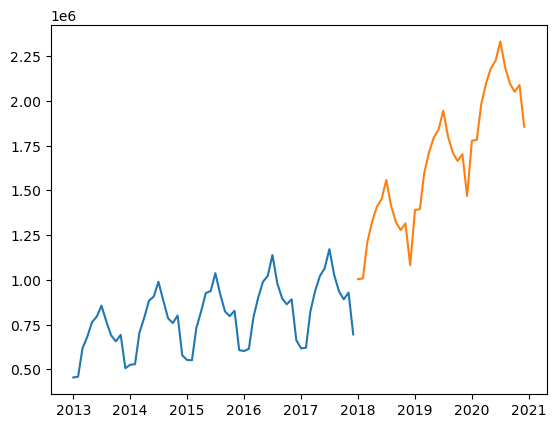

In [33]:
plt.plot(df)
plt.plot(pred1)

In [35]:
new=pd.concat([predicted1,pred1]);new

2017-01-01    0.000000e+00
2017-02-01    6.173060e+05
2017-03-01    6.213690e+05
2017-04-01    8.226670e+05
2017-05-01    9.388620e+05
2017-06-01    1.020686e+06
2017-07-01    1.064624e+06
2017-08-01    1.171393e+06
2017-09-01    1.026403e+06
2017-10-01    9.352630e+05
2017-11-01    8.911600e+05
2017-12-01    9.288370e+05
2018-01-01    1.003823e+06
2018-02-01    1.007886e+06
2018-03-01    1.209184e+06
2018-04-01    1.325379e+06
2018-05-01    1.407203e+06
2018-06-01    1.451141e+06
2018-07-01    1.557910e+06
2018-08-01    1.412920e+06
2018-09-01    1.321780e+06
2018-10-01    1.277677e+06
2018-11-01    1.315354e+06
2018-12-01    1.081687e+06
2019-01-01    1.390340e+06
2019-02-01    1.394403e+06
2019-03-01    1.595701e+06
2019-04-01    1.711896e+06
2019-05-01    1.793720e+06
2019-06-01    1.837658e+06
2019-07-01    1.944427e+06
2019-08-01    1.799437e+06
2019-09-01    1.708297e+06
2019-10-01    1.664194e+06
2019-11-01    1.701871e+06
2019-12-01    1.468204e+06
2020-01-01    1.776857e+06
2

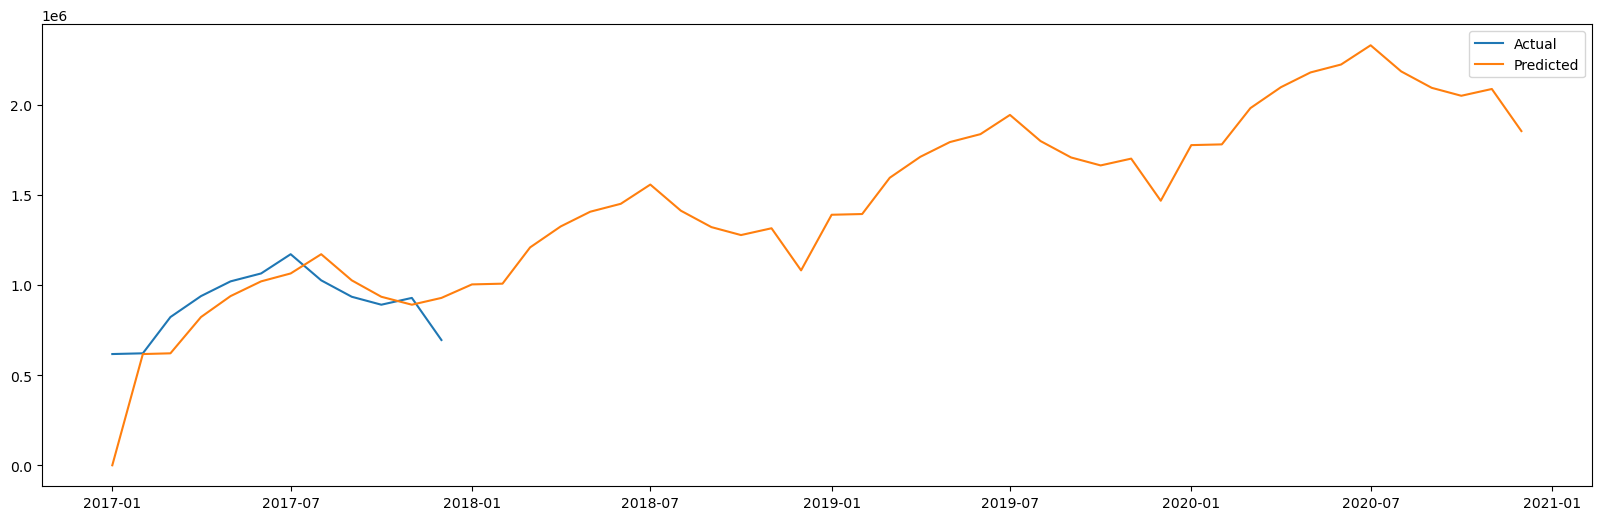

In [36]:
plt.figure(figsize=(20,6))
plt.plot(test_data,label='Actual')
plt.plot(new,label='Predicted')
plt.legend()

# Evaluation 